# Minority Opportunity to Elect



In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import pickle
import pandas as pd

In [2]:
with open("data/OR_precincts/OR_precinct_graph.p", "rb") as f_in:
    graph = pickle.load(f_in)

In [3]:
elections = [Election("GOV18", {"Dem": "GOV18D", "Rep": "GOV18R"}),
             Election("PRES16",{"Dem": "PRES16D","Rep":"PRES16R"}),
             Election("SEN16",{"Dem": "SEN16D","Rep":"SEN16R"}),
             Election("GOV16", {"Dem": "GOV16D", "Rep": "GOV16R"}),
             Election("AG16", {"Dem": "AG16D", "Rep": "AG16R"}),
             Election("SOS16", {"Dem": "SOS16D", "Rep": "SOS16R"}),
             Election("USH18", {"Dem": "USH18D", "Rep": "USH18R"}),
             Election("USH16", {"Dem": "USH16D", "Rep": "USH16R"})]

or_updaters = {"population" : Tally("TOTPOP", alias="population"), 
               "VAP": Tally("VAP"),
               "WVAP": Tally("WVAP"),
               "HVAP": Tally("HVAP"), 
               "HVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["HVAP"].items()},
               "ASIANVAP": Tally("ASIANVAP"), 
               "ASIANVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["ASIANVAP"].items()},
               "HAVAP_perc": lambda p: {k: ((p["HVAP"][k] + p["ASIANVAP"][k]) / v) for k, v in p["VAP"].items()},
               "WVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["WVAP"].items()},
               "cut_edges": cut_edges}

election_updaters = {election.name: election for election in elections}
or_updaters.update(election_updaters)

In [4]:
enact_cong = Partition(graph, assignment="CD", updaters=or_updaters)
enact_sen = Partition(graph, assignment="SEND", updaters=or_updaters)
enact_house = Partition(graph, assignment="HDIST", updaters=or_updaters)

In [5]:
enact_cong["PRES16"].percents("Dem")

(0.5007669093828733,
 0.5231973768440444,
 0.7588221188173767,
 0.6244622701781785,
 0.3919694449925304)

In [104]:
list(acs.columns)

['STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'TOTPOP',
 'WPOP',
 'BPOP',
 'AMINPOP',
 'ASIANPOP',
 'NHPIPOP',
 'OTHERPOP',
 '2MOREPOP',
 '2MOREOTHER',
 '3MOREPOP',
 'NCPOP',
 'NHISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'NH_2MOREOT',
 'NH_3MORE',
 'HISP',
 'H_WHITE',
 'H_BLACK',
 'H_AMIN',
 'H_ASIAN',
 'H_NHPI',
 'H_OTHER',
 'H_2MORE',
 'H_2MOREOTH',
 'H_3MORE',
 'state',
 'county',
 'tract',
 'MU18TOT',
 'MNVU18TOT',
 'MNLU18TOT',
 'MVAPTOT',
 'MNVVAPTOT',
 'MNLVAPTOT',
 'FU18TOT',
 'FNVU18TOT',
 'FNLU18TOT',
 'FVAPTOT',
 'FNVVAPTOT',
 'FNLVAPTOT',
 'MU18WHITE',
 'MNVU18WHIT',
 'MNLU18WHIT',
 'MVAPWHITE',
 'MNVVAPWHIT',
 'MNLVAPWHIT',
 'FU18WHITE',
 'FNVU18WHIT',
 'FNLU18WHIT',
 'FVAPWHITE',
 'FNVVAPWHIT',
 'FNLVAPWHIT',
 'MU18BLK',
 'MNVU18BLK',
 'MNLU18BLK',
 'MVAPBLK',
 'MNVVAPBLK',
 'MNLVAPBLK',
 'FU18BLK',
 'FNVU18BLK',
 'FNLU18BLK',

In [105]:
sum(acs["NH_OTHER"]) / sum(acs["TOTPOP"])

0.001371136861023267

In [106]:
sum(acs["MVAPNHW"] + acs["FVAPNHW"])

2524422

In [107]:
df = gpd.read_file("data/OR_precincts/OR_precincts.shp")

In [108]:
df.columns

Index(['State', 'County', 'Precinct', 'Pct_Name', 'Shape_Leng', 'Shape_Area',
       'GOV18D', 'GOV18R', 'GOV18I', 'GOV18L', 'GOV18C', 'USH18D', 'USH18R',
       'PRES16D', 'PRES16R', 'PRES16L', 'PRES16G', 'SEN16D', 'SEN16R',
       'USH16D', 'USH16R', 'GOV16D', 'GOV16R', 'GOV16I', 'GOV16L', 'AG16D',
       'AG16R', 'SOS16D', 'SOS16R', 'SOS16I', 'SOS16G', 'SOS16L', 'CD',
       'HDIST', 'SEND', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE',
       'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP',
       'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'geometry'],
      dtype='object')

In [109]:
["NH_BLACK"]

['NH_BLACK']

In [110]:
sum(df["OTHERVAP"]) / sum(df["VAP"])

0.001151842070103794

In [81]:
sum(df["OTHERVAP"])

3414

In [82]:
# blocks = gpd.read_file("data/OR_blocks/OR_blocks.shp")

## Ensemble Results

In [107]:
house = np.load("data/min_opp/OR_state_house_10000_blocks_0.02%.p")
sen = np.load("data/min_opp/OR_state_senate_100000_precincts_0.02%.p")

In [8]:
house.keys()

dict_keys(['cutedges', 'HVAP', 'ASIANVAP', 'HVAP_perc', 'ASIANVAP_perc', 'HAVAP_perc', 'WVAP', 'WVAP_perc'])

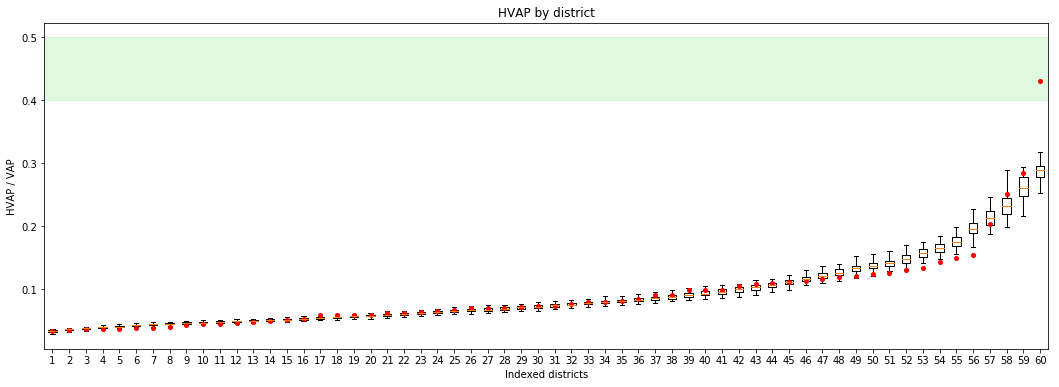

In [119]:
plt.figure(figsize=(18,6))
plt.title("HVAP by district")
plt.ylabel("HVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(house["HVAP_perc"], whis=(1,99), showfliers=False)
plt.plot(range(1, 61), sorted(enact_house["HVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/HVAP_by_district.png", bbox_inches="tight", dpi=200)
plt.show()

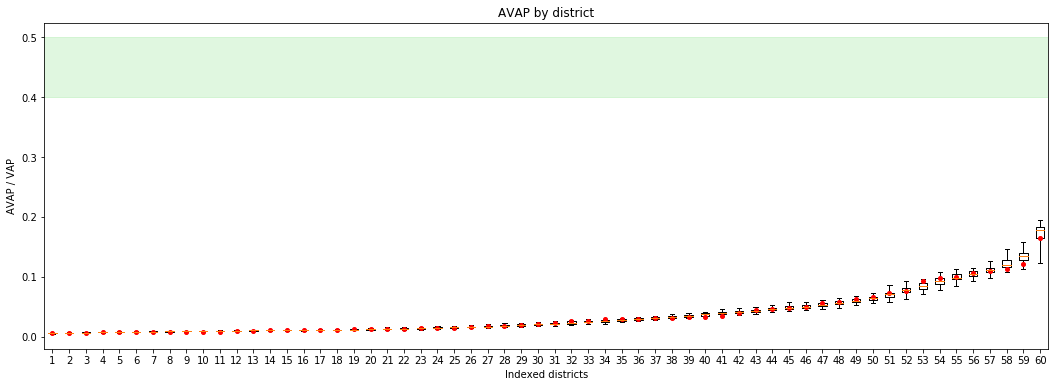

In [118]:
plt.figure(figsize=(18,6))
plt.title("AVAP by district")
plt.ylabel("AVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(house["ASIANVAP_perc"], whis=(1,99), showfliers=False)
plt.plot(range(1, 61), sorted(enact_house["ASIANVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/ASIANVAP_by_district.png", bbox_inches="tight", dpi=200)
plt.show()

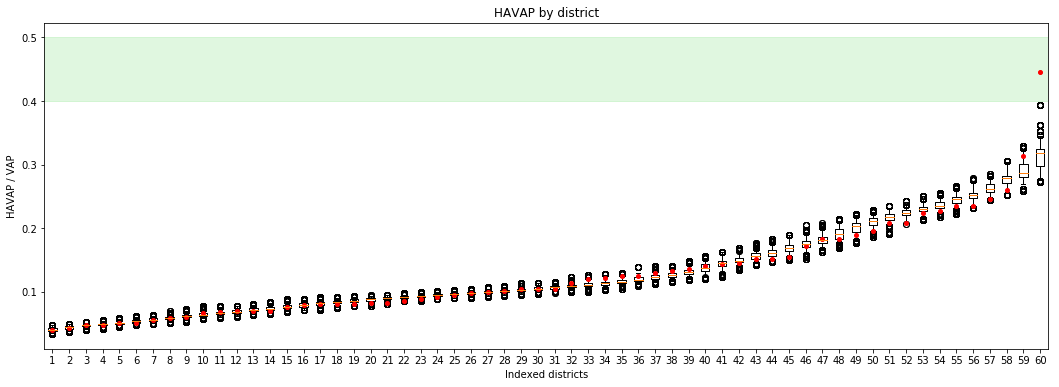

In [114]:
plt.figure(figsize=(18,6))
plt.title("HAVAP by district")
plt.ylabel("HAVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(house["HAVAP_perc"], whis=(1,99), showfliers=True)
plt.plot(range(1, 61), sorted(enact_house["HAVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/HAVAP_by_district.png", bbox_inches="tight", dpi=200)
plt.show()

In [116]:
max(nw[:,59])

0.4355850531866533

In [120]:
max(house["ASIANVAP_perc"][:,59])

0.19593888308164492

In [122]:
max(house["HVAP_perc"][:,59])

0.3645785980543686

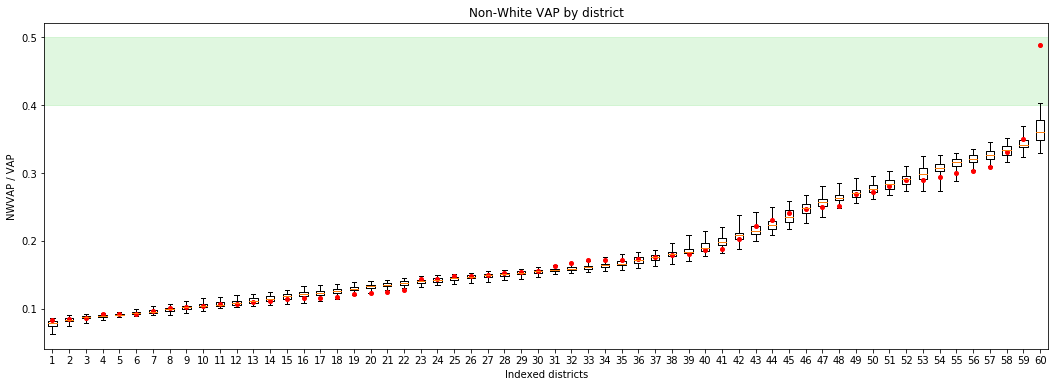

In [126]:
nw = 1 - house["WVAP_perc"]
nw = np.flip(nw, 1)

plt.figure(figsize=(18,6))
plt.title("Non-White VAP by district")
plt.ylabel("NWVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(nw, whis=(1,99), showfliers=False)
plt.plot(range(1, 61), sorted(1 - np.array(list(enact_house["WVAP_perc"].values()))), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/NonWhiteVAP_by_district_house.png", bbox_inches="tight", dpi=200)
plt.show()

## Senate

In [129]:
max(nw[:,29])

0.4061764471784143

In [131]:
max(sen["HVAP_perc"][:,29])

0.3375442027584795

In [132]:
max(sen["ASIANVAP_perc"][:,29])

0.17153516175158312

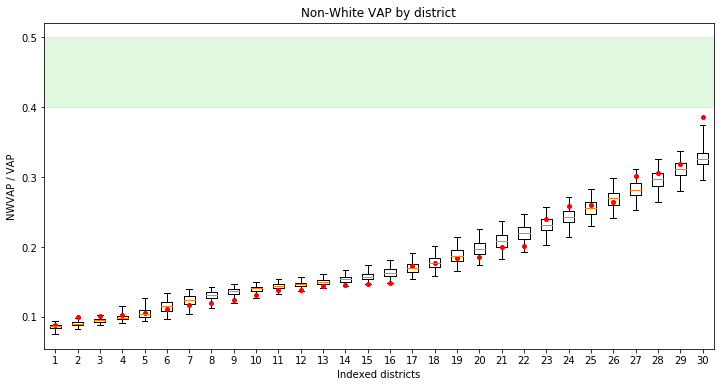

In [128]:
nw = 1 - sen["WVAP_perc"]
nw = np.flip(nw, 1)

plt.figure(figsize=(12,6))
plt.title("Non-White VAP by district")
plt.ylabel("NWVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(nw, whis=(1,99), showfliers=False)
plt.plot(range(1, 31), sorted(1 - np.array(list(enact_sen["WVAP_perc"].values()))), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/NonWhiteVAP_by_district_sen.png", bbox_inches="tight", dpi=200)
plt.show()

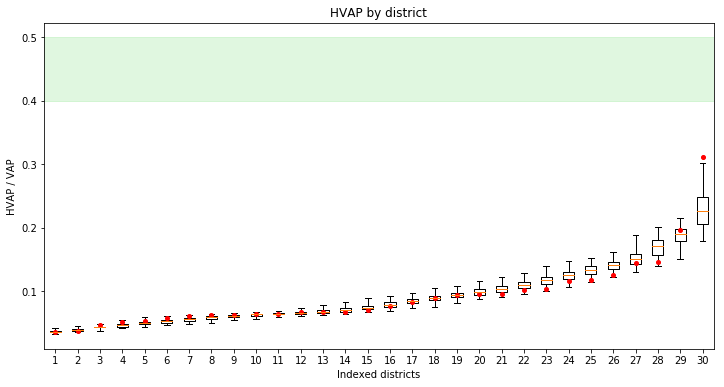

In [140]:
plt.figure(figsize=(12,6))
plt.title("HVAP by district")
plt.ylabel("HVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(sen["HVAP_perc"], whis=(1,99), showfliers=False)
plt.plot(range(1, 31), sorted(enact_sen["HVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/HVAP_by_district_sen.png", bbox_inches="tight", dpi=200)
plt.show()

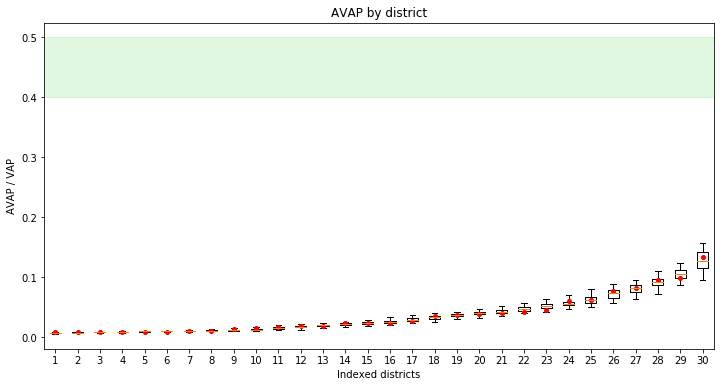

In [141]:
plt.figure(figsize=(12,6))
plt.title("AVAP by district")
plt.ylabel("AVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(sen["ASIANVAP_perc"], whis=(1,99), showfliers=False)
plt.plot(range(1, 31), sorted(enact_sen["ASIANVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/AVAP_by_district_sen.png", bbox_inches="tight", dpi=200)
plt.show()

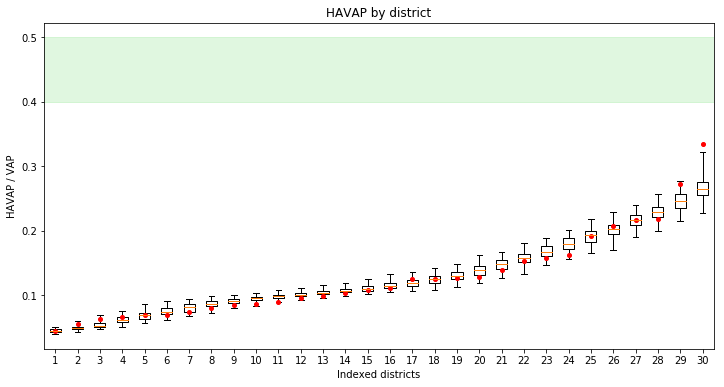

In [52]:
plt.figure(figsize=(12,6))
plt.title("HAVAP by district")
plt.ylabel("HAVAP / VAP")
plt.xlabel("Indexed districts")

plt.boxplot(sen["HAVAP_perc"], whis=(1,99), showfliers=False)
plt.plot(range(1, 31), sorted(enact_sen["HAVAP_perc"].values()), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=4)
plt.axhspan(0.40, 0.50, color="limegreen", alpha=0.15, zorder=0)
plt.savefig("plots/min_opp/HAVAP_by_district_sen.png", bbox_inches="tight", dpi=200)
plt.show()

In [49]:
max(sen["HAVAP_perc"][:,29])

0.3400634296690043

In [56]:
max(house["HAVAP_perc"][:,59])

0.36650693910763527

In [51]:
max(enact_sen["HAVAP_perc"].values())

0.3344801264339393

In [54]:
max(enact_house["HAVAP_perc"].values())

0.4453125

### Baseline Stats

In [8]:
sum(df["HVAP"]) / sum(df["VAP"])

0.0907917412856096

In [9]:
sum(df["ASIANVAP"]) / sum(df["VAP"])

0.03631170317427971

In [15]:
(sum(df["HVAP"]) + sum(df["ASIANVAP"])) / sum(df["VAP"])

0.1271034444598893

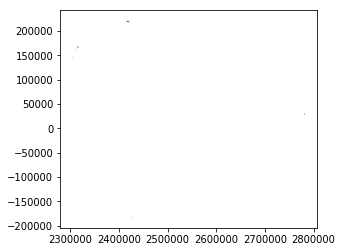

In [46]:
df.loc[df["HVAP"] / df["VAP"] >= 0.5].plot()

In [23]:
sum(df.loc[(df["HVAP"] + df["ASIANVAP"])  / df["VAP"] >= 0.5]["TOTPOP"])

32998

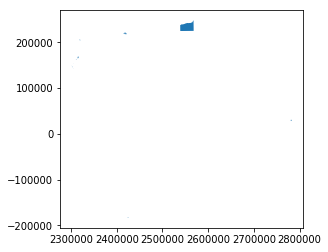

In [47]:
df.loc[(df["HVAP"] + df["ASIANVAP"])  / df["VAP"] >= 0.5].plot()

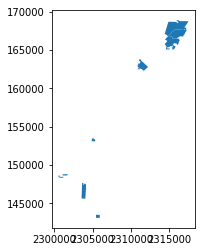

In [71]:
m = df.loc[df["County"] == "Marion"]
m.loc[(df["HVAP"] + df["ASIANVAP"]) / df["VAP"] >= 0.5].plot()

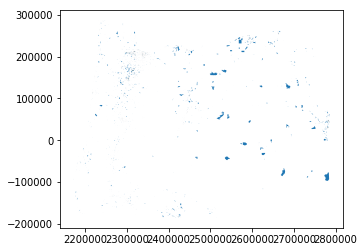

In [83]:
blocks.loc[(blocks["HVAP"] + blocks["ASIANVAP"])  / blocks["VAP"] >= 0.5].plot()

In [88]:
blocks["coalVAP"] = (blocks["HVAP"] + blocks["ASIANVAP"]) / blocks["VAP"]

In [125]:
port = blocks.loc[blocks.COUNTYFP10 == "051"]
wash = blocks.loc[blocks.COUNTYFP10 == "067"]

In [162]:
points = test[["geometry", "TOTPOP", "HVAP", "ASIANVAP", "coalVAP"]]
points["geometry"] = points.geometry.centroid
points["Scale"] = points.TOTPOP / 5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
points["HAVAP"] = points["HVAP"] + points["ASIANVAP"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


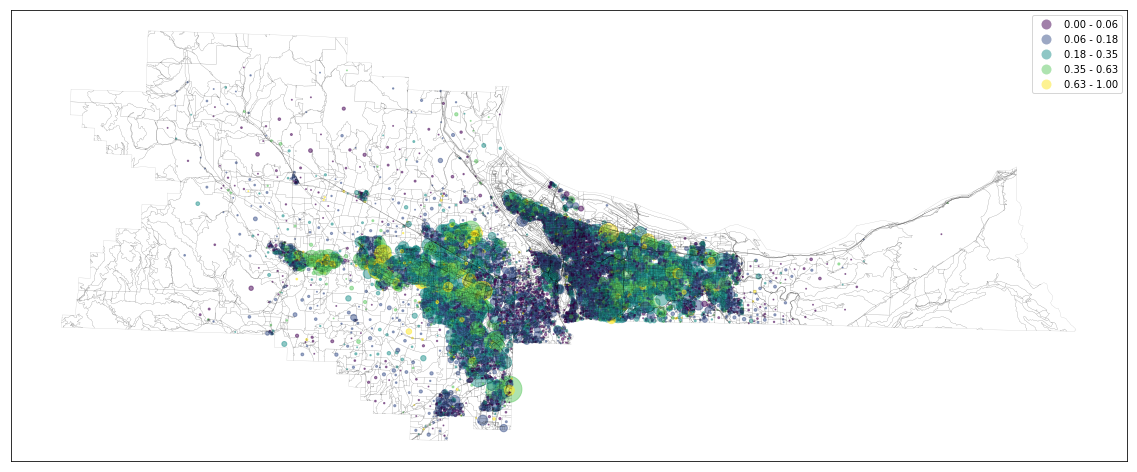

In [164]:
fig = points.plot(marker="o", linestyle="None", markersize="HAVAP", column="coalVAP", 
                  legend=True,figsize=(20,10), alpha=0.5, scheme="naturalbreaks")
test.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=fig)
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("cirle_plot.png",  bbox_inches="tight", dpi=200)
plt.show()

In [133]:
test = port.append(wash)

In [118]:
blocks["coalVAP"] = blocks["coalVAP"].apply(lambda x: 0 if np.isnan(x) else x) 

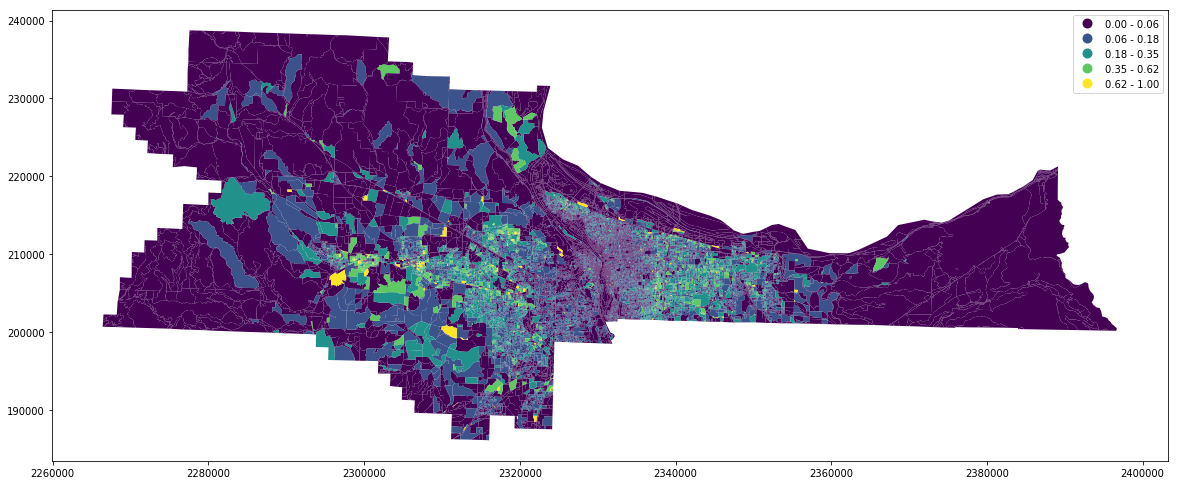

In [138]:
# plt.figure()
test.plot(column="coalVAP",figsize=(20,10), legend=True, scheme="naturalbreaks",)
        #classification_kwds={"bins":[0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]})
plt.show()

In [84]:
blocks.loc[(blocks["HVAP"] + blocks["ASIANVAP"])  / blocks["VAP"] >= 0.5]

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,GOV16I,GOV16L,AG16D,AG16R,SOS16D,SOS16R,SOS16I,SOS16G,SOS16L,geometry
4,41,001,950300,3285,410019503003285,Block 3285,G5040,R,None,None,...,0.056471,0.023529,0.395294,0.607059,0.282353,0.621176,0.070588,0.018824,0.047059,"POLYGON ((2747135.431744939 81141.015130247, 2..."
50,41,001,950200,3015,410019502003015,Block 3015,G5040,U,04654,C,...,0.027460,0.018307,0.205187,0.362319,0.144165,0.389016,0.021358,0.012967,0.019832,"POLYGON ((2710199.989152157 127259.6817205287,..."
224,41,001,950100,2242,410019501002242,Block 2242,G5040,R,None,None,...,0.017949,0.035897,0.264103,1.048718,0.189744,1.089744,0.046154,0.010256,0.041026,"POLYGON ((2694700.022919437 141521.596183894, ..."
303,41,001,950300,3294,410019503003294,Block 3294,G5040,R,None,None,...,0.056471,0.023529,0.395294,0.607059,0.282353,0.621176,0.070588,0.018824,0.047059,"POLYGON ((2755408.779144988 83637.522494123, 2..."
1088,41,001,950600,3340,410019506003340,Block 3340,G5040,R,None,None,...,0.031915,0.010638,0.244681,1.393617,0.127660,1.457447,0.074468,0.010638,0.010638,"POLYGON ((2727936.658608728 148755.3899198123,..."
1201,41,001,950500,1296,410019505001296,Block 1296,G5040,R,None,None,...,0.037267,0.009938,0.288199,1.259627,0.181366,1.408696,0.027329,0.017391,0.019876,"POLYGON ((2712245.847105762 131351.2354935166,..."
1203,41,001,950500,1241,410019505001241,Block 1241,G5040,R,None,None,...,0.055901,0.014907,0.432298,1.889441,0.272050,2.113043,0.040994,0.026087,0.029814,"POLYGON ((2707293.614648654 139174.1658582983,..."
1380,41,001,950300,2002,410019503002002,Block 2002,G5040,R,None,None,...,0.063830,0.021277,0.489362,2.787234,0.255319,2.914894,0.148936,0.021277,0.021277,"POLYGON ((2735935.734761111 133559.503906174, ..."
1686,41,001,950500,1220,410019505001220,Block 1220,G5040,R,None,None,...,0.111801,0.029814,0.864596,3.778882,0.544099,4.226087,0.081988,0.052174,0.059627,"POLYGON ((2707399.723237323 140149.7530740423,..."
1910,41,001,950600,3383,410019506003383,Block 3383,G5040,R,None,None,...,0.031915,0.010638,0.244681,1.393617,0.127660,1.457447,0.074468,0.010638,0.010638,"POLYGON ((2730275.66007571 138528.7924341076, ..."


In [73]:
len(list(filter(lambda x: x > 0.5, blocks["HVAP"] / blocks["VAP"])))

2053

In [75]:
len(list(filter(lambda x: x > 0.5, blocks["ASIANVAP"] / blocks["VAP"])))

412

In [76]:
len(list(filter(lambda x: x > 0.5, (blocks["HVAP"] + blocks["ASIANVAP"]) / blocks["VAP"])))

2705

In [28]:
max(df["TOTPOP"])

17974

In [29]:
17974*13

233662

In [20]:
sum(df["TOTPOP"]) / 30

127680.13333333333

In [25]:
32998 / 127680

0.25844298245614034

In [26]:
sum(df.loc[(df["HVAP"] + df["ASIANVAP"])  / df["VAP"] >= 0.5]["TOTPOP"])

32998

In [28]:
a = df.loc[(df["HVAP"] + df["ASIANVAP"])  / df["VAP"] >= 0.5]

In [31]:
(sum(a["HVAP"]) + sum(a["ASIANVAP"]))/sum(a["VAP"])

0.5889248734206085

In [32]:
0.5889248734206085*0.25 + 0.49*0.75

0.5147312183551521

In [107]:
df["HAVAP"] = df["HVAP"] + df["ASIANVAP"]

In [108]:
df["HA_per"] = df["HAVAP"] / df["VAP"]

In [109]:
df["HA_per"] = df["HA_per"].apply(lambda x: 0 if np.isnan(x) else x)

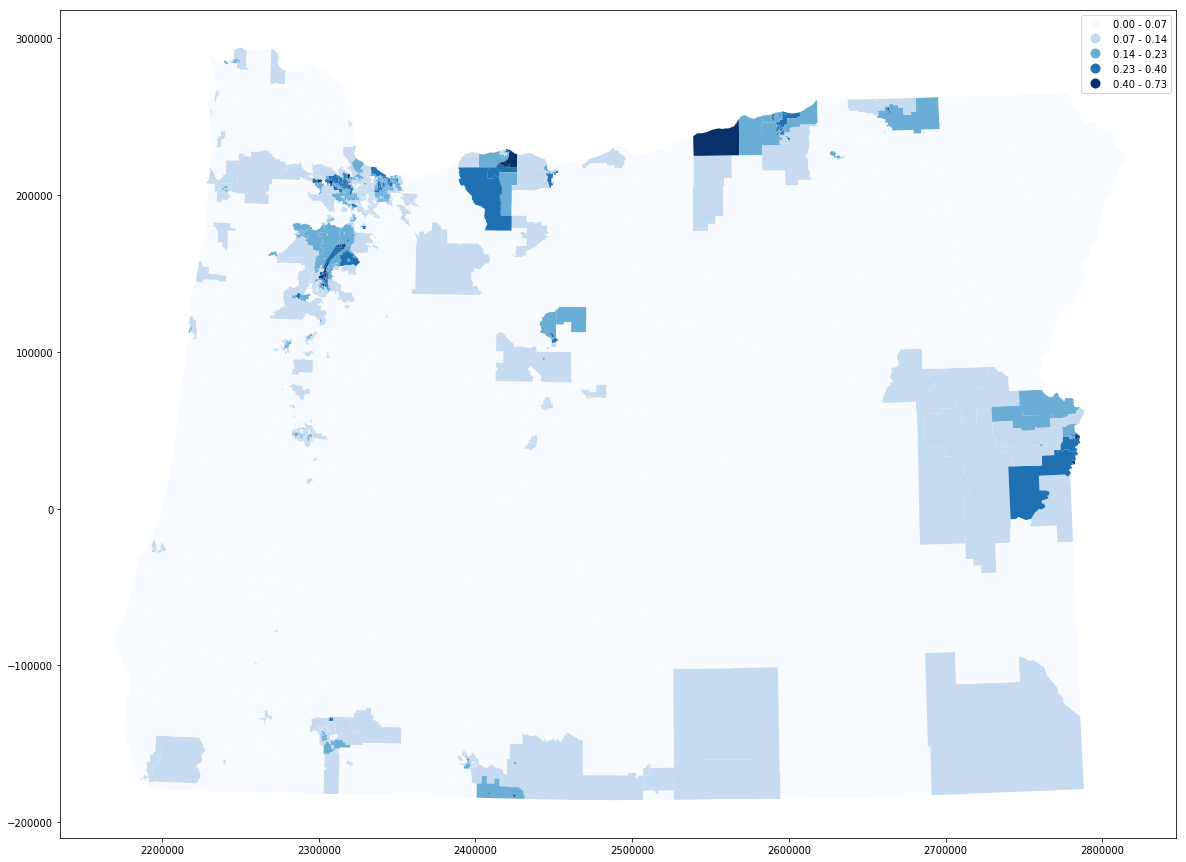

In [110]:
df.plot(column="HA_per", scheme="naturalbreaks", cmap="Blues", legend=True, figsize=(20,20))
plt.show()

In [113]:
df["NW_per"] = 1 - (df["WVAP"] / df["VAP"])
df["NW_per"] = df["NW_per"].apply(lambda x: 0 if np.isnan(x) else x)

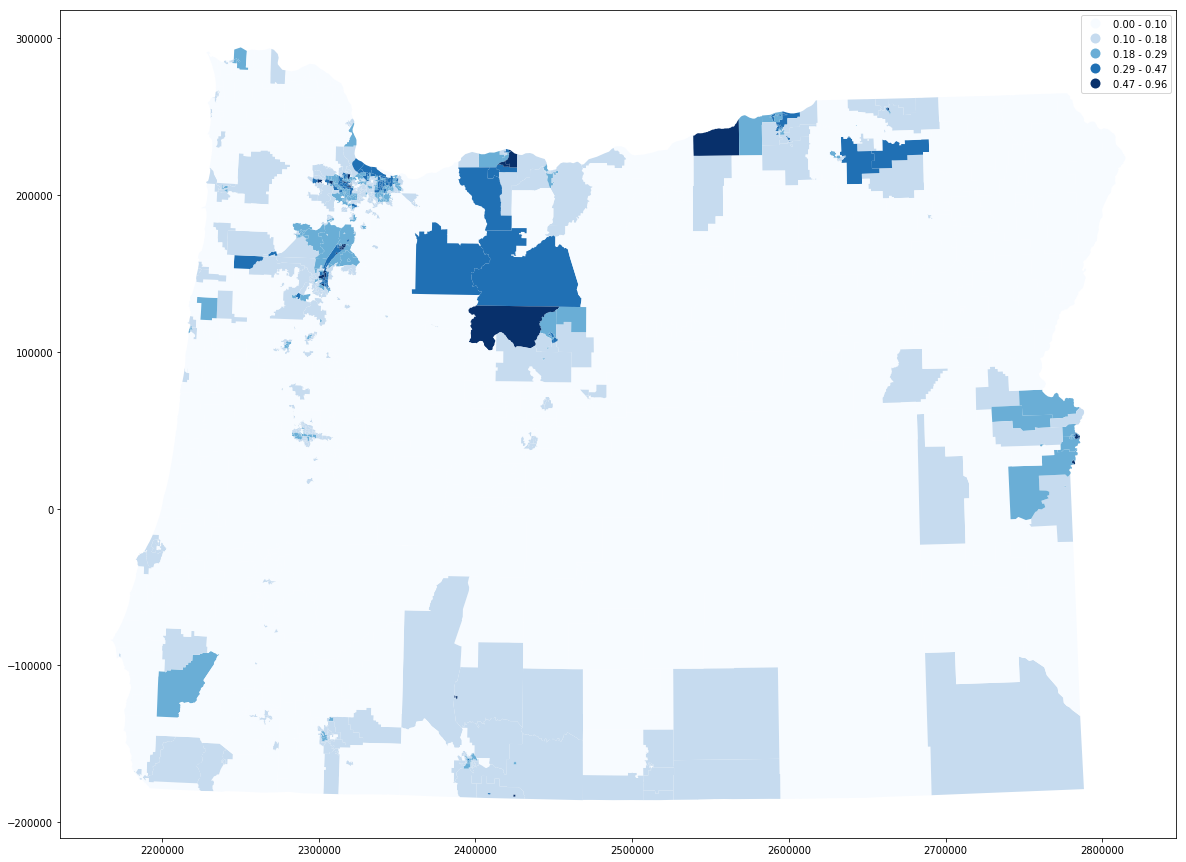

In [113]:
df.plot(column="NW_per", scheme="naturalbreaks", cmap="Blues", legend=True, figsize=(20,20))
plt.show()

In [114]:
len(list(filter(lambda x: x > 0.5, df["NW_per"])))

23

In [134]:
tracts = gpd.read_file("data/OR_tracts/OR_tracts.shp")
tracts = tracts.to_crs({'init': 'epsg:2838'})

In [135]:
tracts["WVAP_perc"] = tracts["WVAP"] / tracts["VAP"]
tracts["nWVAP_perc"] = 1 - tracts["WVAP_perc"]
tracts["WVAP_perc"] = tracts["WVAP_perc"].apply(lambda x: 0 if np.isnan(x) else x)
tracts["nWVAP_perc"] = tracts["nWVAP_perc"].apply(lambda x: 0 if np.isnan(x) else x)

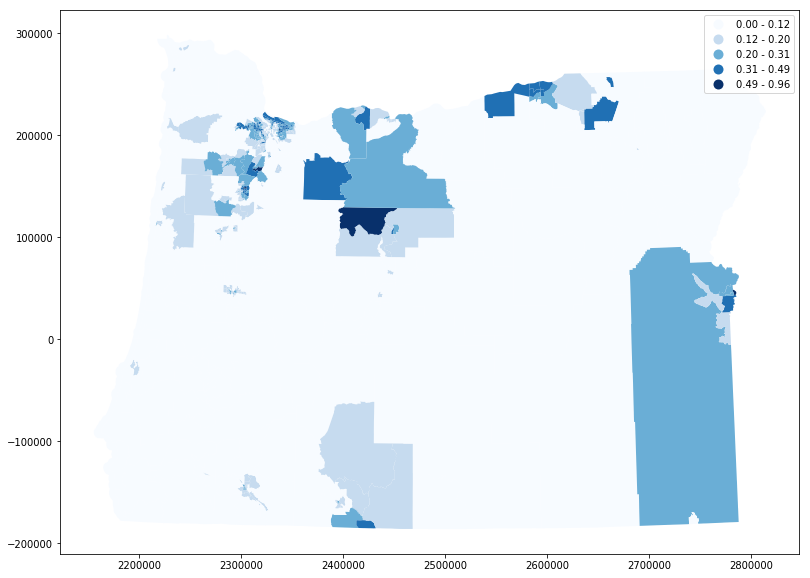

In [136]:
tracts.plot(column="nWVAP_perc", legend=True, cmap="Blues", figsize=(20,10), scheme="naturalbreaks")
#          edgecolor="k", linewidth=0.2)

In [137]:
points = tracts[["geometry", "TOTPOP", "nWVAP_perc"]]
points["geometry"] = points.geometry.centroid
points["Scale"] = points.TOTPOP / 200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


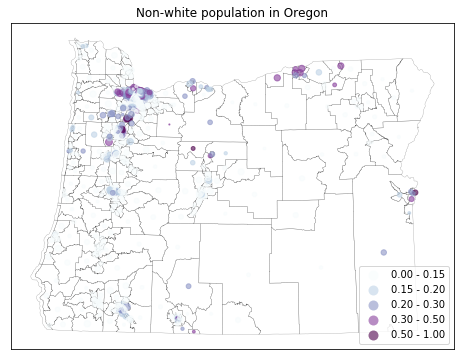

In [138]:
fig = tracts.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.5,figsize=(10,6))


points.plot(marker="o", linestyle="None", markersize="Scale", column="nWVAP_perc",
            cmap="BuPu", legend=True, ax=fig, alpha=0.6, scheme="userdefined", 
            classification_kwds = {"bins": [0.15, 0.2, 0.3, 0.5, 1]})
fig.set_title("Non-white population in Oregon")
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("plots/choropleths/circle_plot.png", bbox_inches="tight", dpi=200)
plt.show()

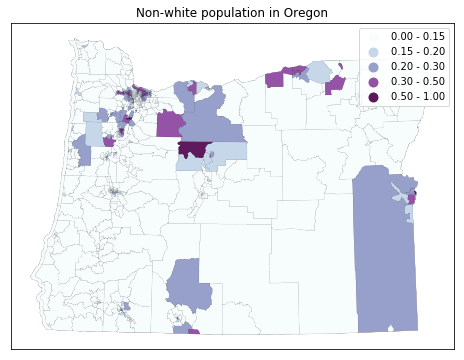

In [139]:
fig = tracts.plot(color="None", linewidth=0.25, edgecolor='k', figsize=(10,6))

tracts.plot(linestyle="None", column="nWVAP_perc", ax=fig, alpha=0.9,
            cmap="BuPu", legend=True,figsize=(10,6), scheme="userdefined", 
            classification_kwds = {"bins": [0.15, 0.2, 0.3, 0.5, 1]})
fig.set_title("Non-white population in Oregon")
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("plots/choropleths/shaded_regions.png", bbox_inches="tight", dpi=200)
plt.show()

In [140]:
clack = tracts.loc[tracts.COUNTYFP == "005"]
colu = tracts.loc[tracts.COUNTYFP == "009"]
mari = tracts.loc[tracts.COUNTYFP == "047"]
mult = tracts.loc[tracts.COUNTYFP == "051"]
wash = tracts.loc[tracts.COUNTYFP == "067"]
yamh = tracts.loc[tracts.COUNTYFP == "071"]

In [141]:
port = pd.concat([clack,colu,mari,mult,wash,yamh])

In [142]:
points_port = port[["geometry", "TOTPOP", "nWVAP_perc"]]
points_port["geometry"] = points_port.geometry.centroid
points_port["Scale"] = points_port.TOTPOP / 200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


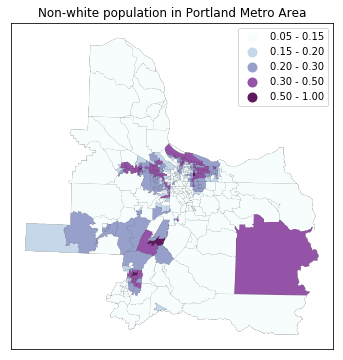

In [143]:
fig = port.plot(color="None", linewidth=0.25, edgecolor='k', figsize=(10,6))

port.plot(linestyle="None", column="nWVAP_perc", ax=fig, alpha=0.9,
            cmap="BuPu", legend=True,figsize=(10,6), scheme="userdefined", 
            classification_kwds = {"bins": [0.15, 0.2, 0.3, 0.5, 1]})
fig.set_title("Non-white population in Portland Metro Area")
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("plots/choropleths/shaded_regions_port.png", bbox_inches="tight", dpi=200)
plt.show()

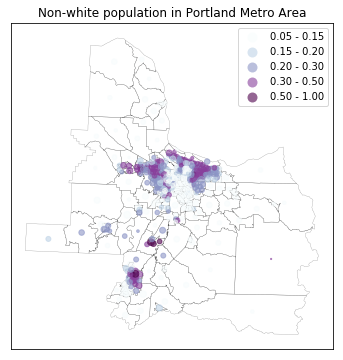

In [144]:
fig = port.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.5,figsize=(10,6))


points_port.plot(marker="o", linestyle="None", markersize="Scale", column="nWVAP_perc",
            cmap="BuPu", legend=True, ax=fig, alpha=0.6, scheme="userdefined", 
            classification_kwds = {"bins": [0.15, 0.2, 0.3, 0.5, 1]})
fig.set_title("Non-white population in Portland Metro Area")
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("plots/choropleths/circle_plot_port.png", bbox_inches="tight", dpi=200)
plt.show()